In [ ]:
"""
story:
let's assume we have a LIDAR
https://www.nuscenes.org/data-annotation
https://level5.lyft.com/dataset/#data-format

WE have a lidar and a detector which should detect pedestrian/traffic signs/and free space
the detector was built by someone else and we do not know anything about its quality, but we want to (and have to) use this in practice.

We want to make the best out of it using repeated measurements.

It is imporant that we asusme that these measurements are completely independent form each other...which is not ture, but we will deal with this in practice later.

"""

import numpy as np
import gdown

## LIDAR Model

In [ ]:
"""
class Model():
  #this is a  simple probabilistic model representing our sensor
  def __init__ (self):
    #constructor

  def GenerateState(self):
    #this function generates a random hidden state
    #has no return value

  def GetState(self):
    #this is a function we can not use inn practice, it reveals the hidden state. We will use this to check our result.
    #returns a number, the index of the hidden state (0,1,2)

  def Measure(self):
    #this funciton makes a measuerement with a previously set hidden state
    #returns the index of the measured state (0,1,2)

  def MeasureKnownState(self,X):
    #this function makes a measurement with a known hidden state
    #the hidden state is the imnput aprametre of the function (0,1,2)
    #returns the index of the measured state (0,1,2)
"""

url = 'https://drive.google.com/uc?id=1mi9WvjTDscb3VZe1Hdg-Iv02DwXYJNR0'
output = 'LIDARModel.py'
gdown.download(url, output, quiet=False)
import LIDARModel as Model

Downloading...
From: https://drive.google.com/uc?id=1mi9WvjTDscb3VZe1Hdg-Iv02DwXYJNR0
To: /content/LIDARModel.py
100%|██████████| 1.09k/1.09k [00:00<00:00, 990kB/s]


In [ ]:
M = Model.Model() #initalize this model
M.GenerateState() #generate a random hidden state

M.GetState()      #we can check the hidden state...!this is not a measurement

0

In [ ]:
#let's make 10 measurements with the known hidden states
for i in range(10):
  print(M.Measure())

0
2
2
2
1
2
0
2
0
0


#Relative frequency

In [ ]:
array = []
array1 = []
array2 = []
for i in range(1000):
  array.append(M.MeasureKnownState(0))
  array1.append(M.MeasureKnownState(1))
  array2.append(M.MeasureKnownState(2))

V = []
V.append(np.count_nonzero(np.array(array) == 0) + np.count_nonzero(np.array(array1) ==0) + np.count_nonzero(np.array(array2) == 0) )
V.append(np.count_nonzero(np.array(array) == 1) + np.count_nonzero(np.array(array1) == 1) + np.count_nonzero(np.array(array2) == 1) )
V.append(np.count_nonzero(np.array(array) == 2) + np.count_nonzero(np.array(array1) == 2) + np.count_nonzero(np.array(array2) == 2) )
V=np.array(V)
print(V/3000)

[0.296      0.30066667 0.40333333]


Relative frequency vector

In [ ]:
M.GetState()

0

In [ ]:
repeat = 10000
states = np.zeros(3)

for i in range(repeat):
  states[M.Measure()]+=1

print(states)

states/=repeat
print(states)

[5022. 1999. 2979.]
[0.5022 0.1999 0.2979]


In [ ]:
repeat = 5000
ReaFreqMatrix = np.zeros((3,3))

for state in range(3):
  for I in range(repeat):
    ReaFreqMatrix[state,M.MeasureKnownState(state)]+=1

print(ReaFreqMatrix) # R

[[2488. 1017. 1495.]
 [1480. 3015.  505.]
 [ 496.  481. 4023.]]


In [ ]:
ObservationMatrix = (ReaFreqMatrix / np.sum(ReaFreqMatrix,0)).T
print(ObservationMatrix) # F

[[0.55734767 0.33154122 0.11111111]
 [0.22534899 0.66807002 0.10658099]
 [0.24821518 0.08384526 0.66793957]]


In [ ]:
ObservationProbability = np.sum(ReaFreqMatrix,0)/np.sum(ReaFreqMatrix)
ObservationProbability #P(z)

array([0.2976    , 0.30086667, 0.40153333])

In [ ]:
DecisionFunction = np.sum(ReaFreqMatrix,0)/np.sum(ReaFreqMatrix,1)
DecisionFunction #P(x|z)

array([0.8928, 0.9026, 1.2046])

In [ ]:
M.GenerateState()
M.GetState()

2

In [ ]:
repeat = 50

# P(x|z) = P(z|x)*P(x)/P(z)

prior = np.array([1/3,1/3,1/3]).T
#DecisionFunction = DecisionFunction.T


In [ ]:
for i in range(repeat):
  Meas = M.Measure()
  prior = (ObservationMatrix[Meas]*prior)/ObservationProbability
  prior = prior/prior.sum()

print(prior)

[5.02156579e-04 4.69489890e-19 9.99497843e-01]


In [ ]:
import matplotlib.pyplot as plt

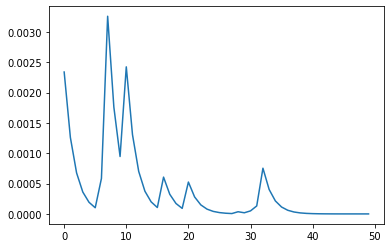

In [ ]:
Entr = np.zeros(repeat)
for i in range(repeat):
  Meas = M.Measure()
  prior = (ObservationMatrix[Meas]*prior)/ObservationProbability
  prior = prior/prior.sum()
  Entr[i] = -np.sum(prior*np.log(prior)) # -E(log(x))

plt.plot(Entr)
plt.show()